In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Walmart.csv')

In [ ]:
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [ ]:
#!pip install numpy==1.23.2

In [ ]:
#!pip install numpy==1.24.3 statsmodels==0.14.0 pmdarima==2.0.4

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:

class timeseries():
  def __init__(self,df):
    self.df=df
    self.x_train=None
    self.x_test=None
    self.pred=None
    self.final_pred=None
    self.store=None
    self.store1=None
    self.store2=None
    self.store3=None
    self.store4=None
    self.keys=[]
    self.decompose={}
  def eda(self):
    self.df.dropna(inplace=True)
    self.df.drop_duplicates(inplace=True)
    self.df['Date']=pd.to_datetime(self.df['Date'],format='%d-%m-%Y')
    self.df.set_index('Date',inplace=True)
  def separationofstores(self):
    self.store={}
    for i in range(1,45):
      self.store[i]=self.df[self.df['Store']==i]['Weekly_Sales']

  def visualization(self):
    for i in range(1,5):
      self.store[i].plot()
      plt.show()
  def decomposition(self,period=13):
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.tsa.seasonal import seasonal_decompose
    self.decompose={}
    for i in range(1,5):
      return adfuller(self.store[i])[1]
      return adfuller(self.store[i])<0.05
      self.decompose[i]=seasonal_decompose(self.store[i],model='additive',period=period)
      self.decompose[i].plot()
      plt.show()
  def dickeyfuller(self,store_numerr=[]):
    from statsmodels.tsa.stattools import adfuller
    for i in range(1,5):
      if adfuller(self.store[i])[1]<0.05:
        print('its fine',i)
        print(adfuller(self.store[i])[1])
      else:
        self.store[i]=self.store[i]-self.store[i].shift(1)
        self.store[i].dropna(inplace=True)
        return adfuller(self.store[i])[1]
  def given(self,i):
    self.store1=self.store[i]
    self.store2=self.store[i+1]
    self.store3=self.store[i+2]
    self.store4=self.store[i+3]
    self.store5=self.store[i+4]
  def spliting(self,x):
    self.x_train=x.iloc[:100]
    self.x_test=x.iloc[100:]
  def plots(self):
    from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
    plot_acf(self.x_train)
    plot_pacf(self.x_train)
    plt.show()

  def itertoolsmode(self):
    import itertools
    self.rmse=[]
    self.order1=[]
    from sklearn.metrics import mean_squared_error
    from statsmodels.tsa.arima.model import ARIMA

    p=range(0,8)
    d=range(1,2)
    q=range(0,8)
    pdq=list(itertools.product(p,d,q))
    for i in pdq:
      self.arim=ARIMA(self.x_train,order=i)
      self.arim1=self.arim.fit()
      self.pred1=self.arim1.predict(start=len(self.x_train),end=len(self.x_train)+len(self.x_test)-1)
      self.rmse.append(np.sqrt(mean_squared_error(self.x_test,self.pred1)))
      self.order1.append(i)
      new=pd.DataFrame(index=self.order1,data=self.rmse,columns=['RMSE'])
    return new.sort_values(by='RMSE')
  def modelbuilding(self,p,d,q):
    self.model=ARIMA(self.x_train,order=(p,d,q))
    self.model1=self.model.fit()
  def sarima(self,p,d,q,l):
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    self.model=SARIMAX(self.x_train,order=(p,d,q),seasonal_order=(p,d,q,l))
    self.model1=self.model.fit()

  def prediction(self):
    self.pred=self.model1.predict(start=len(self.x_train),end=len(self.x_train)+len(self.x_test)-1)
    return self.pred
  def predxplot(self):
    self.store1.plot()
    self.x_test.plot()
    self.pred.plot()
    plt.show()
  def autoarimamodel(self):
    from pmdarima import auto_arima
    self.auto=auto_arima(self.x_train)
    return self.auto.summary()
  def forecast1(self):
    self.future=self.model1.forecast(steps=57)
    self.store1.plot(label='store1')
    self.x_test.plot(label='test')
    self.pred.plot(label='predicted')
    self.future.plot(label='future or forecast')


















In [ ]:
ts.future

2012-01-06    1.621794e+06
2012-01-13    1.891949e+06
2012-01-20    1.886013e+06
2012-01-27    1.656598e+06
2012-02-03    1.771467e+06
2012-02-10    2.021696e+06
2012-02-17    1.630638e+06
2012-02-24    1.661251e+06
2012-03-02    1.834401e+06
2012-03-09    1.889741e+06
2012-03-16    1.733100e+06
2012-03-23    1.788334e+06
2012-03-30    1.852771e+06
2012-04-06    1.683753e+06
2012-04-13    1.649262e+06
2012-04-20    1.759333e+06
2012-04-27    1.800036e+06
2012-05-04    1.715774e+06
2012-05-11    1.714052e+06
2012-05-18    1.736914e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [ ]:
ts.x_test

Date
2012-01-06    1550369.92
2012-01-13    1459601.17
2012-01-20    1394393.84
2012-01-27    1319325.59
2012-02-03    1636339.65
2012-02-10    1802477.43
2012-02-17    1819870.00
2012-02-24    1539387.83
2012-03-02    1688420.76
2012-03-09    1675431.16
2012-03-16    1677472.78
2012-03-23    1511068.07
2012-03-30    1649604.63
2012-04-06    1899676.88
2012-04-13    1621031.70
2012-04-20    1521577.87
2012-04-27    1468928.37
2012-05-04    1684519.99
2012-05-11    1611096.05
2012-05-18    1595901.87
2012-05-25    1555444.55
2012-06-01    1624477.58
2012-06-08    1697230.96
2012-06-15    1630607.00
2012-06-22    1527845.81
2012-06-29    1540421.49
2012-07-06    1769854.16
2012-07-13    1527014.04
2012-07-20    1497954.76
2012-07-27    1439123.71
2012-08-03    1631135.79
2012-08-10    1592409.97
2012-08-17    1597868.05
2012-08-24    1494122.38
2012-08-31    1582083.40
2012-09-07    1661767.33
2012-09-14    1517428.87
2012-09-21    1506126.06
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74
Name: Weekly_Sales, dtype: float64

In [ ]:
ts=timeseries(df)

In [ ]:
ts.eda()

In [ ]:
ts.separationofstores()

In [ ]:
#ts.visualization()

In [ ]:
ts.decomposition()

1.3877788330759434e-05

In [ ]:
store={}
for i in range(1,45):
  store[i]=df[df['Store']==i]['Weekly_Sales']



In [ ]:
'''for i in store.keys():
  store1=store[i]
  store2=store[i+1]
  store3=store[i+2]
  store4=store[i+3]
  store5=store[i+5]
  break
'''

'for i in store.keys():\n  store1=store[i]\n  store2=store[i+1]\n  store3=store[i+2]\n  store4=store[i+3]\n  store5=store[i+5]\n  break\n'

In [ ]:
store.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [ ]:
''''for i in [1]:
  store1=store[i]
  store2=store[i+1]
  store3=store[i+2]
  store4=store[i+3]
  store5=store[i+4]
'''

"'for i in [1]:\n  store1=store[i]\n  store2=store[i+1]\n  store3=store[i+2]\n  store4=store[i+3]\n  store5=store[i+4]\n"

In [ ]:
#store1

In [ ]:
 '''from statsmodels.tsa.seasonal import seasonal_decompose
 decompose={}
 '''



'from statsmodels.tsa.seasonal import seasonal_decompose\ndecompose={}\n'

In [ ]:
'''from statsmodels.tsa.stattools import adfuller


for i in range(1,5):
  print(adfuller(store[i])[1])
  decompose[i]=seasonal_decompose(store[i],model='additive',period=13)
  decompose[i].plot()
  plt.show()
'''


"from statsmodels.tsa.stattools import adfuller\n\n\nfor i in range(1,5):\n  print(adfuller(store[i])[1])\n  decompose[i]=seasonal_decompose(store[i],model='additive',period=13)\n  decompose[i].plot()\n  plt.show()\n"

In [ ]:
a=[1,2,3]
b=['a','b','c']
for i,j in zip(a,b):
  print(i,j)

1 a
2 b
3 c


In [ ]:
ts.dickeyfuller([1,2,3,4])

its fine 1
1.3877788330759434e-05
its fine 2
0.003990207089066268
its fine 3
0.03840926179831264
its fine 4
0.04779866223669829


In [ ]:
ts.given(1)

In [ ]:
ts.store1

Date
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
                 ...    
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74
Name: Weekly_Sales, Length: 143, dtype: float64

In [ ]:
ts.spliting(ts.store1)

In [ ]:
ts.x_train

Date
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
                 ...    
2011-12-02    1584083.95
2011-12-09    1799682.38
2011-12-16    1881176.67
2011-12-23    2270188.99
2011-12-30    1497462.72
Name: Weekly_Sales, Length: 100, dtype: float64

In [ ]:
ts.sarima(6,1,6,7)

In [ ]:
ts.prediction()

2012-01-06    1.621794e+06
2012-01-13    1.891949e+06
2012-01-20    1.886013e+06
2012-01-27    1.656598e+06
2012-02-03    1.771467e+06
2012-02-10    2.021696e+06
2012-02-17    1.630638e+06
2012-02-24    1.661251e+06
2012-03-02    1.834401e+06
2012-03-09    1.889741e+06
2012-03-16    1.733100e+06
2012-03-23    1.788334e+06
2012-03-30    1.852771e+06
2012-04-06    1.683753e+06
2012-04-13    1.649262e+06
2012-04-20    1.759333e+06
2012-04-27    1.800036e+06
2012-05-04    1.715774e+06
2012-05-11    1.714052e+06
2012-05-18    1.736914e+06
2012-05-25    1.657272e+06
2012-06-01    1.671603e+06
2012-06-08    1.830645e+06
2012-06-15    1.731929e+06
2012-06-22    1.708644e+06
2012-06-29    1.734931e+06
2012-07-06    1.801002e+06
2012-07-13    1.616788e+06
2012-07-20    1.603253e+06
2012-07-27    1.814928e+06
2012-08-03    1.711354e+06
2012-08-10    1.720153e+06
2012-08-17    1.711085e+06
2012-08-24    1.844607e+06
2012-08-31    1.652665e+06
2012-09-07    1.657508e+06
2012-09-14    1.902726e+06
2012-09-21    1.769031e+06
2012-09-28    1.723453e+06
2012-10-05    1.772639e+06
2012-10-12    1.918990e+06
2012-10-19    1.603372e+06
2012-10-26    1.627515e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

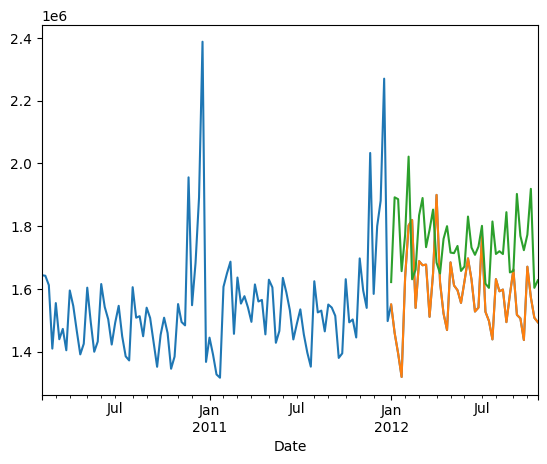

In [ ]:
ts.predxplot()

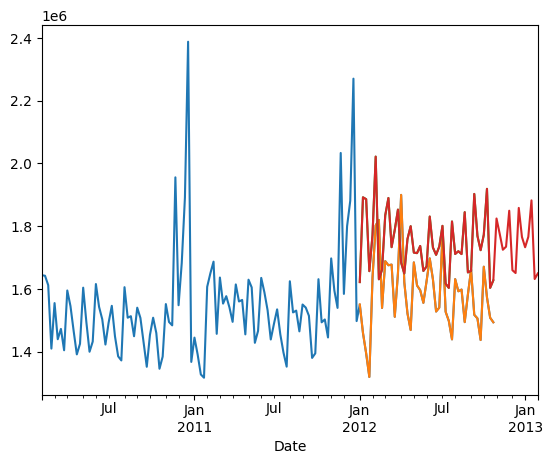

In [ ]:
ts.forecast1()

In [ ]:
#ts.plots()

In [ ]:
'''
import itertools
p=range(0,7)
d=range(1,2)
q=range(0,7)
pdq=list(itertools.product(p,d,q))
rmse=[]
order1=[]
for i in pdq:
  arim=ARIMA(x_t,order=i)
  arim1=arim.fit()
  pred=arim1.predict(start=len(x_t),end=len(x_t)+len(x_ts)-1)
  from sklearn.metrics import mean_squared_error
  rmse.append(np.sqrt(mean_squared_error(x_ts,pred)))
  order1.append(i)
  new=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])
'''

"\nimport itertools\np=range(0,7)\nd=range(1,2)\nq=range(0,7)\npdq=list(itertools.product(p,d,q))\nrmse=[]\norder1=[]\nfor i in pdq:\n  arim=ARIMA(x_t,order=i)\n  arim1=arim.fit()\n  pred=arim1.predict(start=len(x_t),end=len(x_t)+len(x_ts)-1)\n  from sklearn.metrics import mean_squared_error\n  rmse.append(np.sqrt(mean_squared_error(x_ts,pred)))\n  order1.append(i)\n  new=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])\n"

In [ ]:
#new.sort_values(by='RMSE')

In [ ]:
#from statsmodels.tsa.arima.model import ARIMA
